# Derivation of max discharge for circular culvert under uniform flow
### Credit to Dr. Ponce: https://www.youtube.com/watch?v=6AI-l02Nn_U&list=LL&index=3
#### December 28, 2020

# Governing Equations (SI):

# $Q = \frac{1}{n}AR^{2/3}S^{1/2}  $

# $R = \frac{A}{P} $

# $A = \frac{r^2}{2}(\theta-\sin\theta) $

# $P = r\theta $


#### where,
 R = hydraulic radius (m)

 Q = volumetric flow rate (cms)

 A = cross-sectional area (sq-m)

 P = wetted perimeter (m)

 $\theta$ = angle (rad)
 
 r = radius of culvert (m)


In order to simplify our Manning's Equation, we can first replace the $R$ term, with $\frac{A}{P} $. This distributes to the $A$ and $P$ terms already in the equation, yielding:

$Q = \frac{1}{n}A^{5/3}R^{-2/3}S^{1/2}  $

For circular culvert under uniform flow, there is a depth at which the flow rate, $Q$, actually decreases - meaning the maximum flow rate does not occur at 100% capacity. This is not super intuitive, so let's see a quick example of this using a concrete pipe with a slope of 2%.

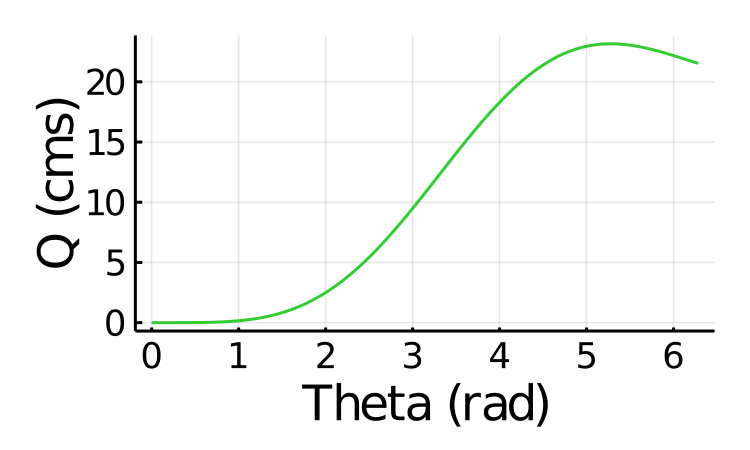

In [133]:
using Plots, DataFrames

# create function for testing different conditions
function civil(n=0.013,S=0.02,r=1.0)
    # set initial theta
    theta = 0.001
    # create blank dataframe
    df = DataFrame(Theta = Float64[], Q = Float64[])
    while theta < (2*pi)
        P = r*theta
        A = (r^2/2)*(theta-sin(theta))
        R = A/P
        Q = (1.0/n)*(A)*(R^(2/3))*(S^(1/2))
        # 'push' new data to dataframe
        push!(df,[theta,Q])
        # step next theta
        theta += 0.001
    end
    p = plot(df.Theta, df.Q,
        color=:limegreen, legend=false, dpi=300)
    plot(p,
        xlabel = "Theta (rad)",
        ylabel = "Q (cms)",
        size = (250,150)
    )
end
civil()


From this visual example, we know for certain that condition $\frac {d}{d\theta}=0$ is a global maxima for $Q$.

So for this condition,

$[\frac{d}{d\theta}] \ \ Q = \frac{1}{n}A^{5/3}R^{-2/3}S^{1/2} = 0$

$\frac{5}{3}A^{2/3}P^{-2/3}\frac{dA}{d\theta}-\frac{2}{3}A^{5/3}P^{-5/3}\frac{dP}{d\theta}=0$

With some algebra we arrive at,

$5P\frac{dA}{d\theta}-2A\frac{dP}{d\theta}=0$

In order to isolate $\theta$, we will bring in our previous equations for $A$ and $P$ and differentiate with respect to $\theta$

$A = \frac{r^2}{2}(\theta-\sin\theta) $  ... (from above)


$\frac{dA}{d\theta} = \frac{r^2}{2}(1-\cos\theta) $


$P = r\theta $ ... (from above)

$\frac{dP}{d\theta} = r $



So now, writing all of this together yields,

$5\theta\frac{r^3}{2}(1-\cos\theta)-2\frac{r^3}{2}(\theta-\sin\theta)=0$

Combining like terms,

$5\theta(1-\cos\theta)-2(\theta-\sin\theta)=0$

$3\theta - 5\theta cos\theta + 2sin\theta =0$

### When solved numerically equates to $\theta = 5.27810713793380 \ rad$



#### Using this value, we can now solve for the maximum discharge for a culvert given uniform flow conditions.


### $A = 3.06115550384082r^{2} $

### $P = 5.27810713793380r$

### $R = 0.57997221804r $

# $Q = \frac{1}{n}2.1289077951351623117213346r^{8/3}S^{1/2}  $


Let's plot this result to our simple example to verify this is correct (blue point).

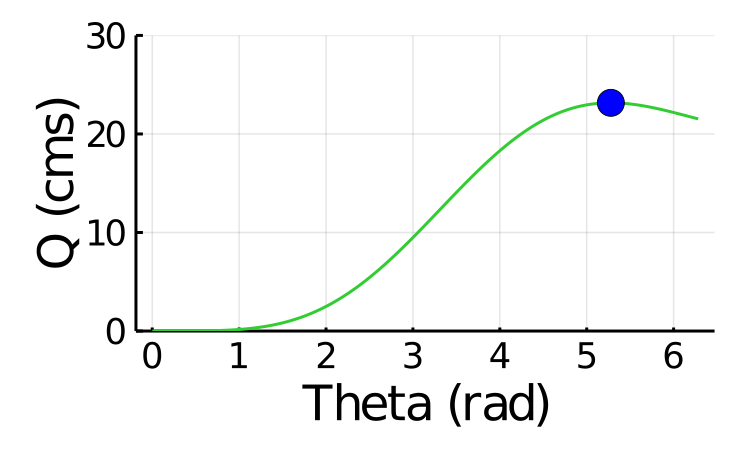

In [134]:
using Plots, DataFrames

# create function for testing different conditions
function civil(n=0.013,S=0.02,r=1.0)
    # set initial theta
    theta = 0.001
    # create blank dataframe
    df = DataFrame(Theta = Float64[], Q = Float64[])
    while theta < (2*pi)
        P = r*theta
        A = (r^2/2)*(theta-sin(theta))
        R = A/P
        Q = (1.0/n)*(A)*(R^(2/3))*(S^(1/2))
        # 'push' new data to dataframe
        push!(df,[theta,Q])
        # step next theta
        theta += 0.001
    end
    p1 = plot(df.Theta, df.Q,
        color=:limegreen, legend=false, dpi=300)

    df2 = DataFrame(Theta = Float64[], Q = Float64[])
    Q2 = (1.0/n)*(2.1289077951351623117213346*r^(8/3))*(S^(1/2))
    t2 = 5.27810713793380
    push!(df2,[t2,Q2])
    scatter!(df2.Theta,df2.Q,
                markersize = 5,
                markercolor = :blue,
                markerstrokestyle = :dot
            )
    plot(p1,
        xlabel = "Theta (rad)",
        ylabel = "Q (cms)",
        size = (250,150),
        ylims = (0,30)
    )
end
civil()